<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

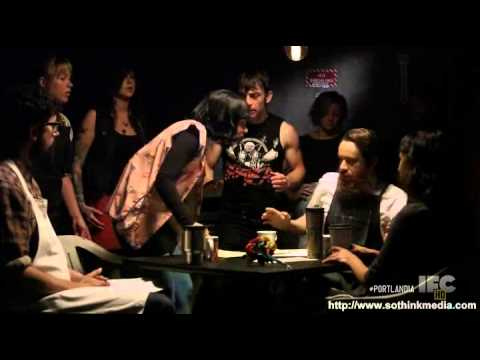

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [ ]:
%pwd

In [2]:
import pandas as pd
file = pd.read_csv('./data/yelp_coffeeshop_review_data.csv')
# url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

# shops = pd.read_csv(url)
shops = file
print(shops.shape)
shops.head()

(7616, 3)


,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


# Start here 

In [3]:
shops.dtypes

coffee_shop_name    object
full_review_text    object
star_rating         object
dtype: object

In [4]:
# Make all the string lines lower case in the column 'full_review_text'

shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.lower())
shops.sample(3)

,coffee_shop_name,full_review_text,star_rating
2167,Houndstooth Coffee,9/23/2014 2 check-ins when i read that hounds...,4.0 star rating
7080,Café Java,"3/5/2016 updated review love the pancake, the...",5.0 star rating
2173,Flat Track Coffee,"11/21/2016 damn good seasonal cold brew, chil...",5.0 star rating


In [5]:
# Let transform column 'star_rating in to integer' for easy read

shops['star_rating'] = shops['star_rating'].str.replace('.0 star rating','')

In [6]:
shops['star_rating'] = shops['star_rating'].astype(int)

In [7]:
shops.head(1)

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in love love loved the atm...,5


In [8]:
shops.dtypes

coffee_shop_name    object
full_review_text    object
star_rating          int64
dtype: object

In [9]:
# Always check value_counts against the columns to look at the patterns

shops['star_rating'].value_counts()

5    3780
4    2360
3     738
2     460
1     278
Name: star_rating, dtype: int64

In [10]:
# 'Good' and 'Bad' coffee shops for future reference

shops['bad_coffee_shops'] = shops['star_rating'] <= 3

In [11]:
shops['good_coffee_shops'] = shops['star_rating'] >= 4

In [12]:
shops.sample(3)

,coffee_shop_name,full_review_text,star_rating,bad_coffee_shops,good_coffee_shops
1406,Caffe Medici,4/25/2014 1 check-in cool atmosphere in a cut...,4,False,True
2393,Anderson’s Coffee Company,12/24/2011 this is an old school establishmen...,1,True,False
4508,Friends & Neighbors,"10/14/2015 beautiful! i feel comfortable, at ...",5,False,True


### Make one_review as a sample

In [13]:
one_review = shops['full_review_text'][0]
one_review

' 11/25/2016 1 check-in love love loved the atmosphere! every corner of the coffee shop had its own style, and there were swings!!! i ordered the matcha latte, and it was muy fantastico! ordering and getting my drink were pretty streamlined. i ordered on an ipad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. i got my latte within minutes!  i was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. any ideas? '

In [ ]:
pip install datefinder

##### the ways we can extract the date from a string

In [14]:
import re
from datetime import datetime

match = re.search(r'\d{2}.\d{2}.\d{4}', one_review)
date = datetime.strptime(match.group(), '%m/%d/%Y').date()
print (date)

2016-11-25


In [16]:
dates = []
for text in shops['full_review_text']:
    dates.append(re.findall(r'\b[0-3]?[0-9]/[0-3]?[0-9]/(?:[0-9]{2})?[0-9]{2}\b', text)[0])
shops['review_date'] = dates

In [17]:
# Converting column 'review_date' to datetime format

shops['review_date'] = pd.to_datetime(shops['review_date'])

In [18]:
shops.sample(3)

,coffee_shop_name,full_review_text,star_rating,bad_coffee_shops,good_coffee_shops,review_date
1842,Epoch Coffee,12/3/2015 one of my favorite coffee spots in ...,5,False,True,2015-12-03
1838,Epoch Coffee,10/13/2016 i had their chai tea and it was al...,3,True,False,2016-10-13
1220,Houndstooth Coffee,10/2/2015 i never cease to be amazed by the v...,5,False,True,2015-10-02


In [19]:
shops.dtypes

coffee_shop_name             object
full_review_text             object
star_rating                   int64
bad_coffee_shops               bool
good_coffee_shops              bool
review_date          datetime64[ns]
dtype: object

#### Remove dates from the 'full_review_text', we separated the dates to a different column

In [21]:
one_review[11:].strip()

'1 check-in love love loved the atmosphere! every corner of the coffee shop had its own style, and there were swings!!! i ordered the matcha latte, and it was muy fantastico! ordering and getting my drink were pretty streamlined. i ordered on an ipad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. i got my latte within minutes!  i was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. any ideas?'

In [22]:
no_dates = []
for text in shops['full_review_text']:
    no_dates.append(text[11:].strip())
shops['full_review_text'] = no_dates

In [23]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,bad_coffee_shops,good_coffee_shops,review_date
0,The Factory - Cafe With a Soul,1 check-in love love loved the atmosphere! eve...,5,False,True,2016-11-25
1,The Factory - Cafe With a Soul,"listed in date night: austin, ambiance in aust...",4,False,True,2016-12-02
2,The Factory - Cafe With a Soul,1 check-in listed in brunch spots i loved the ...,4,False,True,2016-11-30
3,The Factory - Cafe With a Soul,very cool decor! good drinks nice seating how...,2,True,False,2016-11-25
4,The Factory - Cafe With a Soul,1 check-in they are located within the northcr...,4,False,True,2016-12-03


In [25]:
print(shops.shape)

(7616, 6)


In [26]:
shops.sample(5)

,coffee_shop_name,full_review_text,star_rating,bad_coffee_shops,good_coffee_shops,review_date
4496,Friends & Neighbors,check-in jackie offered wonderful service to m...,5,False,True,2016-09-02
2523,Caffé Medici,1 check-in this location differs from its sist...,4,False,True,2014-10-15
342,Summermoon Coffee Bar,he half winter moon is the best tasting iced l...,5,False,True,2016-08-04
2752,Bennu Coffee,"perfect place to study with your laptops, sinc...",4,False,True,2016-07-19
3855,Cream Whiskers,to the young woman in the front counter wearin...,3,True,False,2016-08-21


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [27]:
import re

re.sub(r'[^a-zA-Z ^0-9]', '', one_review)

' 11252016 1 checkin love love loved the atmosphere every corner of the coffee shop had its own style and there were swings i ordered the matcha latte and it was muy fantastico ordering and getting my drink were pretty streamlined i ordered on an ipad which included all beverage selections that ranged from coffee to wine desired level of sweetness and a checkout system i got my latte within minutes  i was hoping for a typical heart or feather on my latte but found myself listing out all the possibilities of what the art may be any ideas '

In [28]:
one_review.split(" ")[0:9]

['',
 '11/25/2016',
 '1',
 'check-in',
 'love',
 'love',
 'loved',
 'the',
 'atmosphere!']

### Overall Word / Token Count

In [29]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [30]:
# How can we count the raw text?
shops['full_review_text'].value_counts(normalize=True)[:5]

1 check-in ok, let's try this approach...  pros: music seating decor general ambiance service  cons: ipad ordering (i'm a crotchety old man, kids) limited coffee menu, or menu in general relatively expensive food is pretty but lackluster  i'm still sitting here as i type this and i'm less than overjoyed with the experience, sadly. the space and vibe are great but not quite familiar or intimate enough to beat out a place like genuine joe down the street. it seems like they bank on the vibe, and fall short the rest of the way. (this would be a great hangout for the artsy/design crowd having a collaborative meeting.)  the staff is great but the ipad ordering system limits your required interaction with them. they take pride in no wifi to increase interaction but then use ipads instead of people?  seating is ample, if cramped in a surprisingly large space.  but the food, kids. so pretty, but again lackluster. i tried the pop+art ($5) and the nutella waffle ($4.75) and they both sit on thei

In [31]:
tokenize(one_review)[0:10]

['11252016',
 '1',
 'checkin',
 'love',
 'love',
 'loved',
 'the',
 'atmosphere',
 'every',
 'corner']

In [32]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [33]:
shops.head(3)

,coffee_shop_name,full_review_text,star_rating,bad_coffee_shops,good_coffee_shops,review_date
0,The Factory - Cafe With a Soul,1 check-in love love loved the atmosphere! eve...,5,False,True,2016-11-25
1,The Factory - Cafe With a Soul,"listed in date night: austin, ambiance in aust...",4,False,True,2016-12-02
2,The Factory - Cafe With a Soul,1 check-in listed in brunch spots i loved the ...,4,False,True,2016-11-30


### View Counts by Rating

- Hint: a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5.

In [34]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [35]:
shops.sample(3)

,coffee_shop_name,full_review_text,star_rating,bad_coffee_shops,good_coffee_shops,review_date,tokens
3045,Halcyon,would have been a cool place but the bartender...,1,True,False,2016-09-30,"[would, have, been, a, cool, place, but, the, ..."
6916,La Patisserie,check-in my friend and i came here this mornin...,3,True,False,2015-06-06,"[checkin, my, friend, and, i, came, here, this..."
6676,Alta’s Cafe,there are few places on town lake with the vie...,1,True,False,2016-11-30,"[there, are, few, places, on, town, lake, with..."


In [36]:
shops['tokens'].head()

0    [1, checkin, love, love, loved, the, atmospher...
1    [listed, in, date, night, austin, ambiance, in...
2    [1, checkin, listed, in, brunch, spots, i, lov...
3    [very, cool, decor, good, drinks, nice, seatin...
4    [1, checkin, they, are, located, within, the, ...
Name: tokens, dtype: object

In [37]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34754),
 ('and', 26650),
 ('a', 22746),
 ('i', 20097),
 ('to', 17163),
 ('of', 12600),
 ('is', 12000),
 ('coffee', 10344),
 ('was', 9705),
 ('in', 9542)]

In [38]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [39]:
# Use the Function
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
51,the,6844,34754,1.0,0.044946,0.044946,0.898634
46,and,6864,26650,2.0,0.034466,0.079412,0.901261
72,a,6244,22746,3.0,0.029417,0.108829,0.819853
23,i,5505,20097,4.0,0.025991,0.134820,0.722820
28,to,5653,17163,5.0,0.022196,0.157016,0.742253


In [40]:
# import spacy
# from spacy.tokenizer import Tokenizer

# nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [41]:
[token.text for token in tokenizer(one_review)][0:15]

[' ',
 '11/25/2016',
 '1',
 'check-in',
 'love',
 'love',
 'loved',
 'the',
 'atmosphere!',
 'every',
 'corner',
 'of',
 'the',
 'coffee',
 'shop']

In [42]:
# Tokenizer Pipe for 'Good' reviews

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [43]:
shops['tokens'].head(3)

0    [1, check-in, love, love, loved, the, atmosphe...
1    [listed, in, date, night:, austin,, ambiance, ...
2    [1, check-in, listed, in, brunch, spots, i, lo...
Name: tokens, dtype: object

In [44]:
wc = count(shops['tokens'])

In [45]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
53,the,6844,34594,1.0,0.043617,0.043617,0.898634
46,and,6853,26442,2.0,0.033339,0.076957,0.899816
74,a,6238,22648,3.0,0.028555,0.105512,0.819065
25,i,5488,19850,4.0,0.025028,0.130540,0.720588
28,to,5638,17007,5.0,0.021443,0.151983,0.740284


In [46]:
# Spacy's Default Stop Words
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [47]:
print(type(nlp.Defaults.stop_words))

<class 'set'>


In [77]:
STOP_WORDS = nlp.Defaults.stop_words.union(['and', 'a', 'i', 'to', "i've", 'I', ' ', ' -', '-', '1', 'date', '/', 'amazon', 'i', 'Amazon', 'it', "it's", 'it.', 'the', 'this',])

In [49]:
STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 '/',
 '1',
 'Amazon',
 'I',
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'amazon',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'date',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former'

In [50]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [51]:
shops['tokens'].head()

0    [1, check-in, love, love, loved, atmosphere!, ...
1    [listed, date, night:, austin,, ambiance, aust...
2    [1, check-in, listed, brunch, spots, loved, ec...
3    [cool, decor!, good, drinks, nice, seating,  ,...
4    [1, check-in, located, northcross, mall, shopp...
Name: tokens, dtype: object

In [78]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [65]:
shops['tokens'].head()

0    [check-in, love, love, loved, atmosphere!, cor...
1    [listed, night:, austin,, ambiance, austin, be...
2    [check-in, listed, brunch, spots, loved, eclec...
3    [cool, decor!, good, drinks, nice, seating,  ,...
4    [check-in, located, northcross, mall, shopping...
Name: tokens, dtype: object

In [74]:
shops['tokens'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[check-in, listed, search, fantastic, coffee, so,, didn't, want, write, review., didn't, want, tell, awesome, factory, cafe, soul, don't, want, overrun, super, busy, place, sit, like, decent, coffee, shops, austin., happened, come, friend, mid-week, sat, hours,, enjoying, peace, quiet,, atmosphere,, awesome, coffee.,  , place, little, eclectic, lots, peculiar, art,, books,, games,, knick-knacks,, head-scratching, drink, food, menu., waffles, pop, tarts...and, beer?, and..., coffee, mojitos?, well,, works., going, here,, works, fabulously., serve, stumptown, coffee,, northwest,, totally, appreciate., brew, coffee, correctly., hint, bitterness, overcooked, milk, going, here., ipad, ordering, screens, cool,, (although, need, options, customization), million, different, types, seating,, (couches,, pillows,, swings,, big, chairs,, ...]    4
[tried, new, cafe, spot, burnet, friend, unassuming, storefront,, decor, quaint, af, order, ipads, counter, choose, place, sit.,  , brunch, spot, though

In [ ]:
# Make 2 different data sets 'Bad' & 'Good' shops

shops[shops['bad_coffee_shops'] == True][0:5]  # .value_counts()

In [ ]:
mask = shops['bad_coffee_shops'] == True
bad_shops = shops[mask]
good_shops = shops[~mask]

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


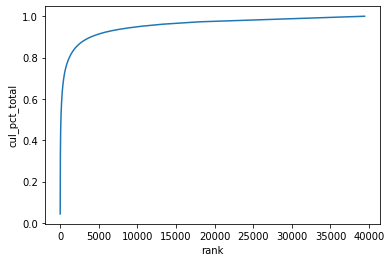

In [54]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [67]:
wc[wc['rank'] <= 20]['cul_pct_total'].max()

0.14076431387202706

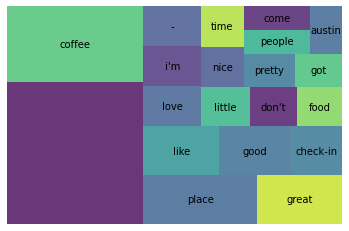

In [75]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [ ]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

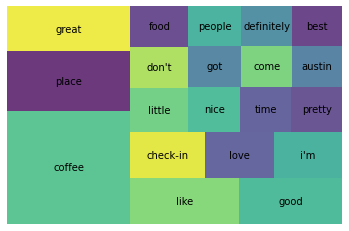

In [79]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [80]:
shops.sample(1)

,coffee_shop_name,full_review_text,star_rating,bad_coffee_shops,good_coffee_shops,review_date,tokens
6688,Alta’s Cafe,1 check-in this cafe is tucked at the waller b...,5,False,True,2016-04-22,"[check-in, cafe, tucked, waller, boathouse, ar..."


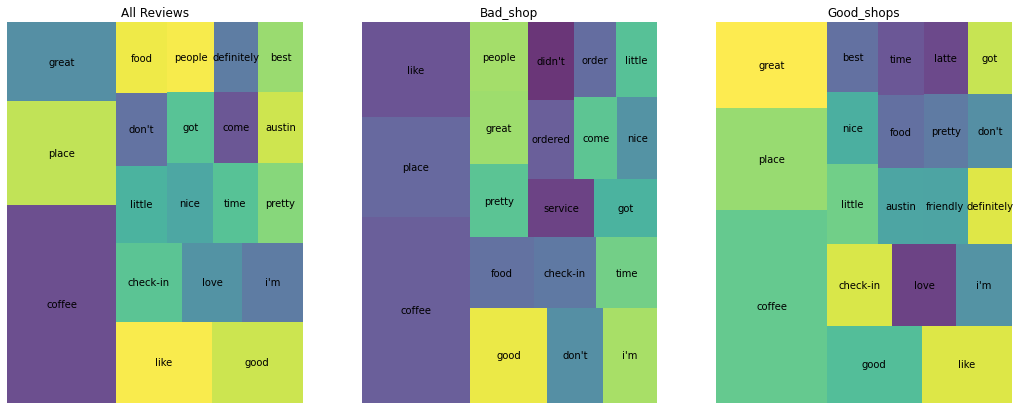

In [82]:
wc = count(shops['tokens'])
bad_shops = count(shops[shops['bad_coffee_shops'] == True]['tokens'])
good_shops = count(shops[shops['good_coffee_shops'] == True]['tokens'])
# Get top 20 word occurences for each set of data
wc_top20 = wc[wc['rank'] <= 20]
bad_shops_top20 = bad_shops[bad_shops['rank'] <= 20]
good_shops_top20 = good_shops[good_shops['rank'] <= 20]
fig, axes = plt.subplots(1, 3, figsize=(18, 7))
axes[0].set_title('All Reviews')
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8, ax=axes[0])
axes[0].axis('off')
axes[1].set_title('Bad_shop')
squarify.plot(sizes=bad_shops_top20['pct_total'], label=bad_shops_top20['word'], alpha=.8, ax=axes[1])
axes[1].axis('off')
axes[2].set_title('Good_shops')
squarify.plot(sizes=good_shops_top20['pct_total'], label=good_shops_top20['word'], alpha=.8, ax=axes[2])
axes[2].axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

